#**Chicago Taxi Trips**

**Data**

https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew/data




**Importing Libraries**

In [1]:
import pandas as pd                         
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')  

**Loading the Data**

In [2]:
Trips= pd.read_csv('/content/TaxiTrips_chunk.csv')

**Description about the Dataframe**

In [3]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99743 entries, 0 to 99742
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99743 non-null  int64  
 1   Trip ID                     99743 non-null  object 
 2   Taxi ID                     99743 non-null  object 
 3   Trip Start Timestamp        99743 non-null  object 
 4   Trip End Timestamp          99705 non-null  object 
 5   Trip Seconds                96960 non-null  float64
 6   Trip Miles                  99743 non-null  float64
 7   Pickup Census Tract         66796 non-null  float64
 8   Dropoff Census Tract        66355 non-null  float64
 9   Pickup Community Area       89030 non-null  float64
 10  Dropoff Community Area      87392 non-null  float64
 11  Fare                        99743 non-null  float64
 12  Tips                        99743 non-null  float64
 13  Tolls                       995

**Drop Unnamed column**

In [4]:
Trips=Trips.drop("Unnamed: 0",axis=1)

**Check for Data types**

In [5]:
Trips.dtypes


Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

We can see "Trp Start Timestamp", "Trip End Timestamp" are represented as object data type, need to be changed as Datatime



**Change the DataTypes**

In [6]:
Trips['Trip Start Timestamp']=pd.to_datetime(Trips['Trip Start Timestamp'],errors='coerce')
Trips['Trip End Timestamp']=pd.to_datetime(Trips['Trip End Timestamp'],errors='coerce')

**Histograms representation of features in Dataframe**

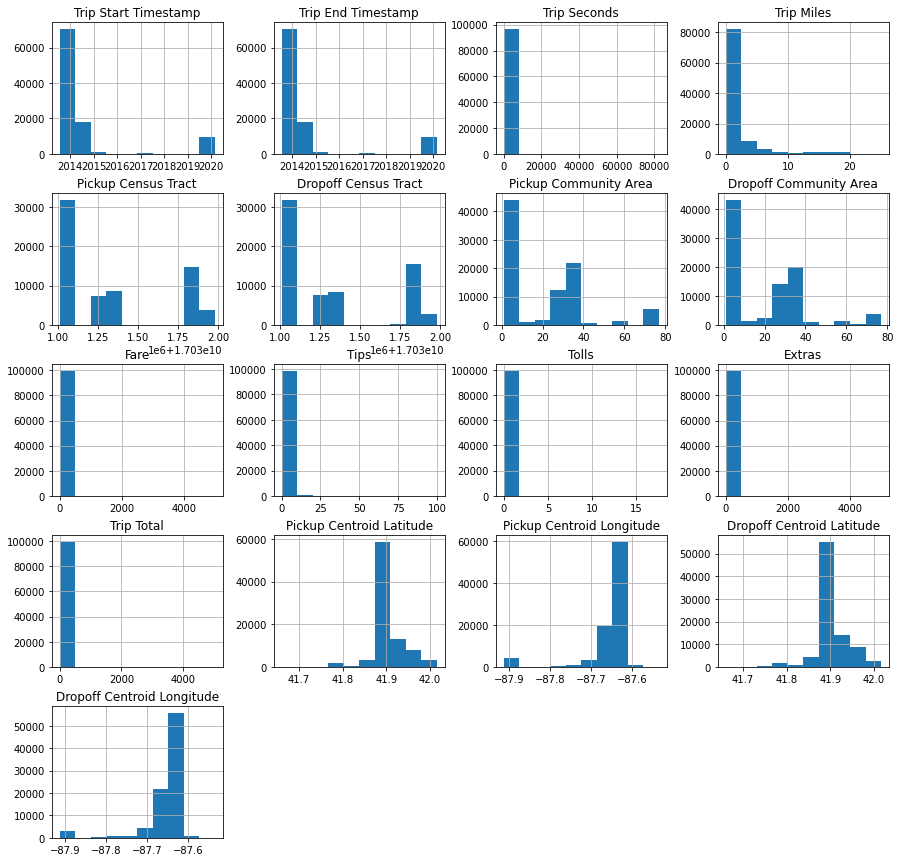

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
Trips.hist()
plt.show()

I have considered  trips if the Trip Miles is more than 0. So I have taken a new Dataset having miles more than 0 for future analysis.

In [8]:
Taxis = Trips[(Trips['Trip Miles']!= 0)]
Taxis.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,2014-01-16 14:45:00,2014-01-16 15:15:00,1380.0,3.9,NaN,NaN,8.0,24.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,2014-01-21 12:00:00,2014-01-21 12:00:00,180.0,0.7,NaN,NaN,7.0,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
4,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,2014-07-29 18:15:00,2014-07-29 18:30:00,900.0,2.3,NaN,NaN,32.0,28.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
5,9ddcd3eb46b8e80d7da4cca5c710db0ff268c790,dedd84a3aba1c80512f36b0685619a6fd03320e86853f3...,2013-12-10 11:15:00,2013-12-10 11:15:00,240.0,0.7,NaN,NaN,24.0,24.0,...,0.0,4.85,Cash,Dispatch Taxi Affiliation,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
6,a4e38bfe3e9cd18c231898ac2128fd3a9158dc56,d3068a62a49dbec13e21fe5232de4358a74e761cce0091...,2014-01-25 02:15:00,2014-01-25 02:15:00,420.0,1.1,1.703132e+10,1.703108e+10,32.0,8.0,...,1.5,7.75,Cash,Northwest Management LLC,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


**Checking for Nullvalues**


In [9]:
Nullcheck = Taxis.isnull().sum()/(len(Taxis))*100 
Nullcheck

Trip ID                        0.000000
Taxi ID                        0.000000
Trip Start Timestamp           0.000000
Trip End Timestamp             0.000000
Trip Seconds                   0.003513
Trip Miles                     0.000000
Pickup Census Tract           29.205530
Dropoff Census Tract          29.323216
Pickup Community Area          3.602607
Dropoff Community Area         5.100912
Fare                           0.000000
Tips                           0.000000
Tolls                          0.309146
Extras                         0.000000
Trip Total                     0.000000
Payment Type                   0.000000
Company                        1.786373
Pickup Centroid Latitude       3.602607
Pickup Centroid Longitude      3.602607
Pickup Centroid Location       3.602607
Dropoff Centroid Latitude      4.925260
Dropoff Centroid Longitude     4.925260
Dropoff Centroid  Location     4.925260
dtype: float64

**Bar Plotting of Missing Values**

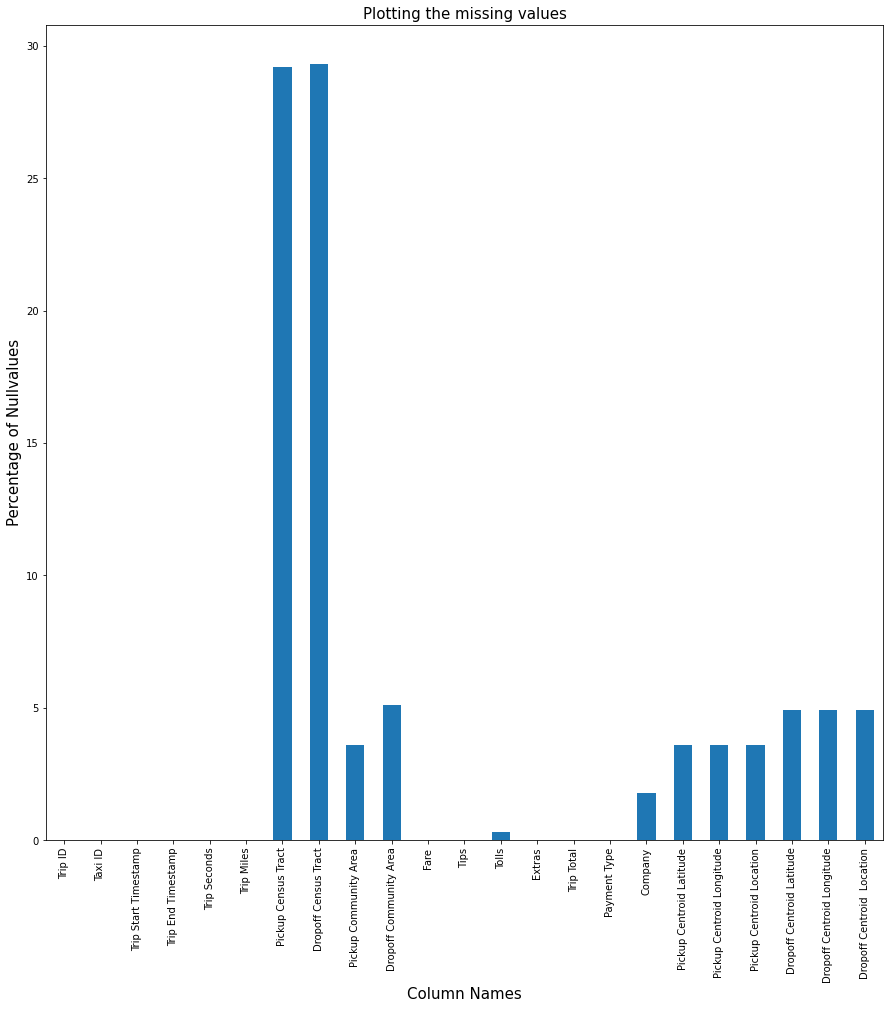

In [10]:
Nullcheck.plot(kind="bar")
plt.title("Plotting the missing values",fontsize=15)
plt.xlabel("Column Names",fontsize=15)
plt.ylabel("Percentage of Nullvalues",fontsize=15) 
plt.show()

We can observe that Most of the null values are available in pickup and drop off locations and their codes. We are not removing any null values since the perecentage is only around 30%.

**Range of the Dataframe**

In [11]:
print("rows = ",Taxis.shape[0])
print("columns = ",Taxis.shape[1])

rows =  56931
columns =  23


**Checking for the data**

In [12]:
Taxis.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,2014-01-16 14:45:00,2014-01-16 15:15:00,1380.0,3.9,NaN,NaN,8.0,24.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,2014-01-21 12:00:00,2014-01-21 12:00:00,180.0,0.7,NaN,NaN,7.0,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
4,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,2014-07-29 18:15:00,2014-07-29 18:30:00,900.0,2.3,NaN,NaN,32.0,28.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
5,9ddcd3eb46b8e80d7da4cca5c710db0ff268c790,dedd84a3aba1c80512f36b0685619a6fd03320e86853f3...,2013-12-10 11:15:00,2013-12-10 11:15:00,240.0,0.7,NaN,NaN,24.0,24.0,...,0.0,4.85,Cash,Dispatch Taxi Affiliation,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
6,a4e38bfe3e9cd18c231898ac2128fd3a9158dc56,d3068a62a49dbec13e21fe5232de4358a74e761cce0091...,2014-01-25 02:15:00,2014-01-25 02:15:00,420.0,1.1,1.703132e+10,1.703108e+10,32.0,8.0,...,1.5,7.75,Cash,Northwest Management LLC,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


**Statistics of a Dataframe**

In [13]:
Taxis.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,56929.000000,56931.000000,4.030400e+04,4.023700e+04,54880.000000,54027.000000,56931.000000,56931.000000,56755.000000,56931.000000,56931.000000,54880.000000,54880.000000,54127.000000,54127.000000
mean,804.669711,2.993225,1.703135e+10,1.703134e+10,22.046993,20.829085,12.015805,1.074787,0.001266,0.950497,14.064564,41.902707,-87.656391,41.902701,-87.653913
std,875.117359,4.297643,3.357046e+05,3.308747e+05,18.878816,17.344961,23.002215,2.149682,0.088797,27.035743,36.077887,0.037599,0.064867,0.038287,0.055058
min,0.000000,0.010000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.673820,-87.913625,41.660136,-87.913625
25%,360.000000,0.700000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.250000,0.000000,0.000000,0.000000,7.050000,41.880994,-87.655998,41.880994,-87.657005
50%,600.000000,1.300000,1.703124e+10,1.703124e+10,15.000000,14.000000,8.250000,0.000000,0.000000,0.000000,9.550000,41.892508,-87.633308,41.893216,-87.635760
75%,960.000000,3.100000,1.703183e+10,1.703183e+10,32.000000,32.000000,13.000000,2.000000,0.000000,1.000000,14.450000,41.921877,-87.626215,41.922686,-87.626215
max,71448.000000,25.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,5000.800000,50.000000,17.580000,5011.110000,5022.960000,42.015697,-87.534903,42.015934,-87.534903


##**Exploratory Data Analysis(EDA)**

**Splitting the timestamps**

In [14]:
Taxis['Start Date']=Taxis['Trip Start Timestamp'].dt.day
Taxis['Start Month']=Taxis['Trip Start Timestamp'].dt.month
Taxis['Start Year']=Taxis['Trip Start Timestamp'].dt.year

**In which year did the highest number of trips occured?**

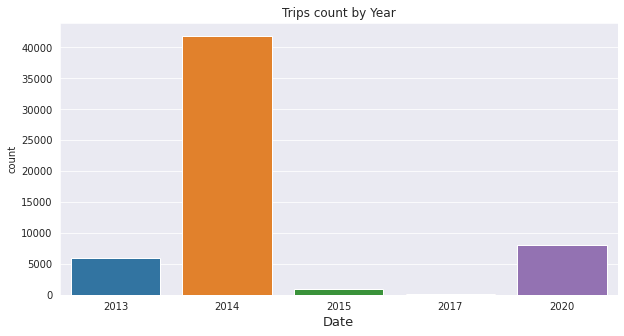

In [15]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Start Year",data=Taxis)
plt.title("Trips count by Year")
plt.xlabel("Date",fontsize=13)
plt.show()

In [16]:
Taxis['Start Year'].unique()

array([2014, 2013, 2020, 2015, 2017])

From the graph above we can say year 2014 has recorded the highest number of trips.

**On which day of the month most of trips happend?**

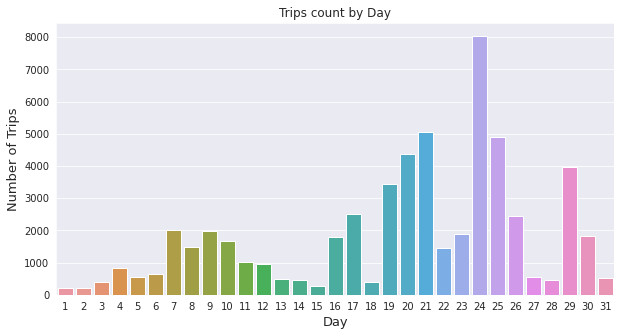

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Start Date",data=Taxis)
plt.title("Trips count by Day")
plt.xlabel("Day",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

Increase in trip count  are seen from the second half of the month. 

**Which month had highest count of trips ?**



In [18]:
Taxis['month_name'] = Taxis['Trip Start Timestamp'].dt.month_name()
Taxis['month_name']

0         January
1         January
4            July
5        December
6         January
           ...   
99736    February
99737     January
99740        July
99741     January
99742     January
Name: month_name, Length: 56931, dtype: object

In [19]:
Months = ['January','February','March','April','May','June', 'July','August','September','October','November','December']
mapping = {day: i for i, day in enumerate(Months)}
key = Taxis['month_name'].map(mapping)
monthname= Taxis.iloc[key.argsort()].set_index('month_name')
monthname.reset_index(inplace=True)

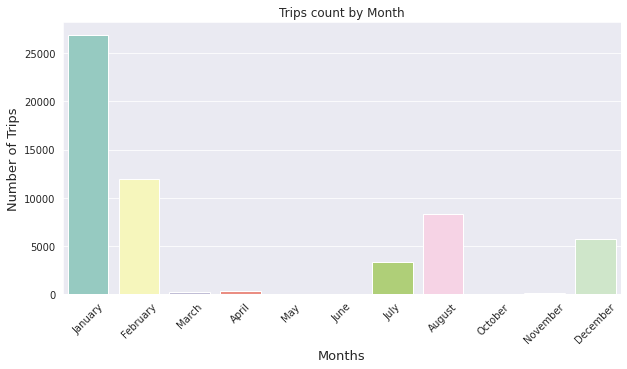

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
chart=sns.countplot(x="month_name",data=monthname,palette="Set3")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title("Trips count by Month")
plt.xlabel("Months",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

In [21]:
Taxis['month_name'].unique()

array(['January', 'July', 'December', 'August', 'February', 'March',
       'April', 'October', 'June', 'November', 'May'], dtype=object)

We can see majority of trips are done in the month of January.

**Highest number of trips in a week**

In [22]:
Taxis['week_day']=Taxis['Trip Start Timestamp'].dt.weekday+1
Taxis['week_day']

0        4
1        2
4        2
5        2
6        6
        ..
99736    4
99737    2
99740    6
99741    5
99742    4
Name: week_day, Length: 56931, dtype: int64

In [23]:
Taxis['week_name']= Taxis['Trip Start Timestamp'].dt.day_name()
Taxis['week_name']


0        Thursday
1         Tuesday
4         Tuesday
5         Tuesday
6        Saturday
           ...   
99736    Thursday
99737     Tuesday
99740    Saturday
99741      Friday
99742    Thursday
Name: week_name, Length: 56931, dtype: object

In [24]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = Taxis['week_name'].map(mapping)
weekday= Taxis.iloc[key.argsort()].set_index('week_name')
weekday.reset_index(inplace=True)

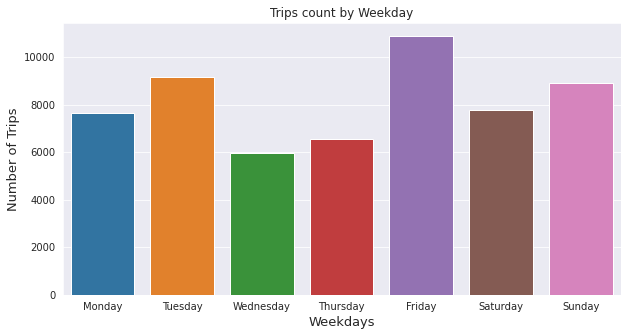

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="week_name",data=weekday)
plt.title("Trips count by Weekday")
plt.xlabel("Weekdays",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

We can observe from the graph that more than 15000 people use cabs on Friday, Tuesday and Sunday when compared to remaining days.

**Which hour in a day recorded highest number of trips?**

In [26]:
Taxis['hour'] = Taxis['Trip Start Timestamp'].dt.hour

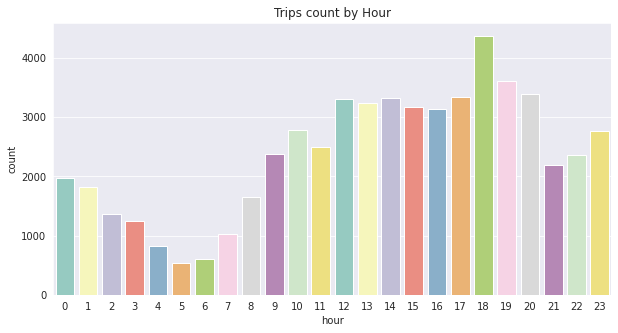

In [27]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="hour",data=Taxis,palette="Set3")
plt.title("Trips count by Hour")
plt.show()

Most of the trips are taken place from the second half of the day

**Pickup Community Area**


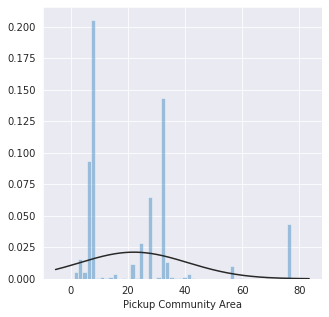

In [28]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.distplot(Taxis["Pickup Community Area"], fit=norm, kde=False)
plt.show()

**Dropoff Community Area**

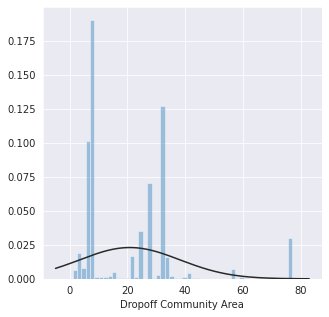

In [29]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
#sns.distplot(Taxis["Dropoff Community Area"], rug=True, hist=False)
sns.distplot(Taxis["Dropoff Community Area"], fit=norm, kde=False)
#sns.distplot(Taxis["Dropoff Community Area"])
plt.show()

Seem's like their is no much difference between pick up community area and drop off community area. So i have checked for correlation between them, which say's there is not much correlation. Based on this I conclude that they are not correlated and keep both the columns.

In [30]:
Taxis['Pickup Community Area'].corr(Taxis['Dropoff Community Area'])

0.08342659184163868

**Distribution on Fare Trip**

In [31]:
fare_min=Taxis['Fare'].min()
fare_max=Taxis['Fare'].max()
print("maximum cost =",fare_max)
print("minimum cost =",fare_min)

maximum cost = 5000.8
minimum cost = 0.0


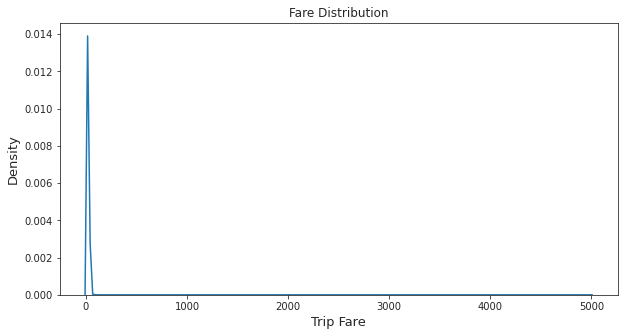

In [32]:
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.kdeplot(data=Taxis["Fare"])
plt.title("Fare Distribution")
plt.xlabel("Trip Fare",fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.show()

To visualize the graph range is more . As the majority of fare is around 100, so i have limited it to 100 and considered remaning values as outliers.

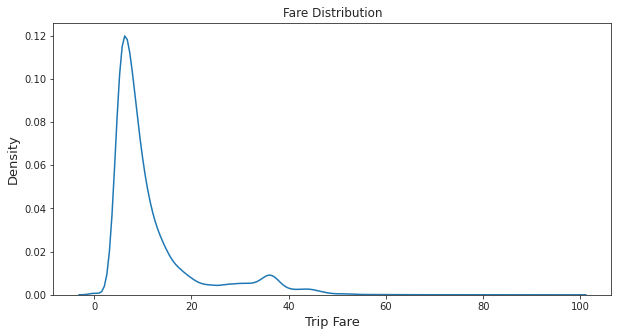

In [33]:
Taxis_fare=Taxis[Taxis["Fare"]<=100]
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.kdeplot(data=Taxis_fare["Fare"])
plt.title("Fare Distribution")
plt.xlabel("Trip Fare",fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.show()

From the above graph we can say that most of the trips are of low cost and peak around $10.

**Payment Methods**

In [34]:
Taxis['Payment Type'].unique()

array(['Credit Card', 'Cash', 'No Charge', 'Mobile', 'Unknown', 'Prcard',
       'Dispute', 'Prepaid'], dtype=object)

In [35]:
Taxis['Payment Type'].value_counts()

Cash           37163
Credit Card    18650
No Charge        518
Mobile           221
Prcard           161
Unknown          160
Dispute           57
Prepaid            1
Name: Payment Type, dtype: int64

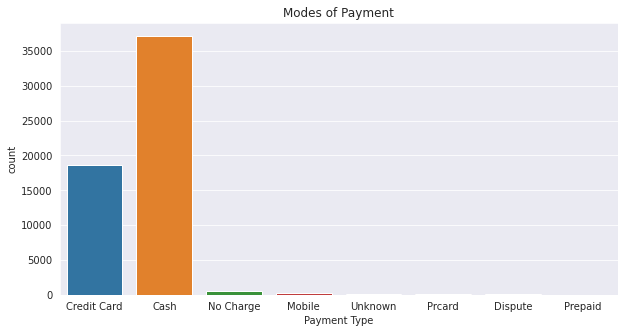

In [36]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Payment Type",data=Taxis)
plt.title("Modes of Payment")
plt.show()

In [37]:
Taxis['Company'].nunique()

98

Total amount of the Trip Company wise

In [38]:
Totalamount= Taxis[['Trip Total', 'Company']].groupby('Company').sum()
Totalamount.sort_values(by='Trip Total', inplace=True, ascending=False)
Totalamount.reset_index(inplace=True)
Totalamount

,Company,Trip Total
0,Taxi Affiliation Services,380235.35
1,Dispatch Taxi Affiliation,119586.52
2,Choice Taxi Association,66794.48
3,Blue Ribbon Taxi Association Inc.,37274.47
4,KOAM Taxi Association,29983.47
...,...,...
93,6057 - 24657 Richard Addo,7.25
94,3556 - 36214 RC Andrews Cab,6.00
95,3011 - JBL Cab Inc.,5.85
96,5074 - 54002 Ahzmi Inc,5.65


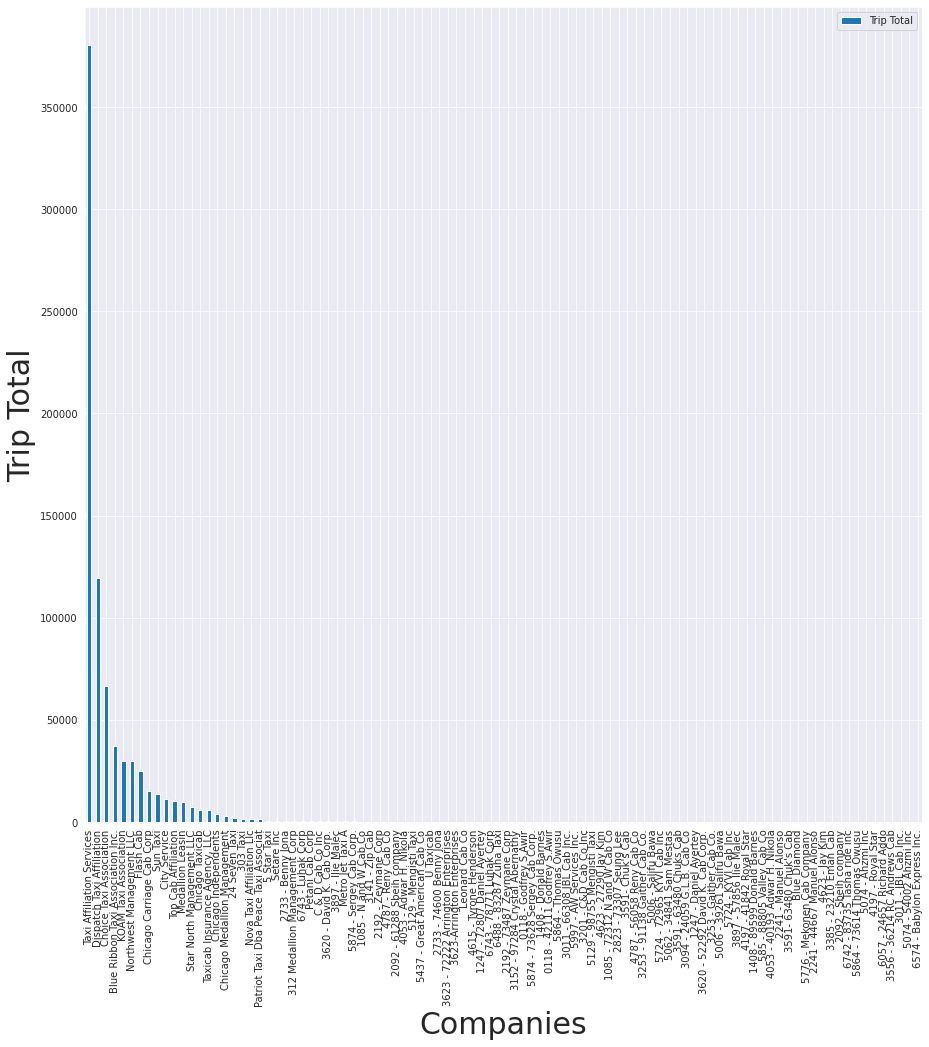

In [39]:
Totalamount.plot.bar(x='Company',y='Trip Total')
plt.xlabel('Companies',fontsize=30)
plt.ylabel('Trip Total',fontsize=30)
#plt.figure(figsize=(40,5))
plt.rcParams["figure.figsize"] = [30, 30]

Top 10 companies with Total Trip Count

In [40]:
(Totalamount.nlargest(10,['Trip Total']))

,Company,Trip Total
0,Taxi Affiliation Services,380235.35
1,Dispatch Taxi Affiliation,119586.52
2,Choice Taxi Association,66794.48
3,Blue Ribbon Taxi Association Inc.,37274.47
4,KOAM Taxi Association,29983.47
5,Northwest Management LLC,29694.72
6,Flash Cab,25031.40
7,Chicago Carriage Cab Corp,14925.34
8,Sun Taxi,13467.06
9,City Service,11044.06


Least 10 countires with Total Trip count

In [41]:
(Totalamount.nsmallest(10,['Trip Total']))

,Company,Trip Total
97,6574 - Babylon Express Inc.,5.25
96,5074 - 54002 Ahzmi Inc,5.65
95,3011 - JBL Cab Inc.,5.85
94,3556 - 36214 RC Andrews Cab,6.00
92,4197 - Royal Star,7.25
93,6057 - 24657 Richard Addo,7.25
91,5074 - Ahzmi Inc,10.45
90,5864 - 73614 Thomas Owusu,11.90
89,6742 - 83735 Tasha ride inc,12.00
88,2092 - Sbeih company,12.25


**Correlation**

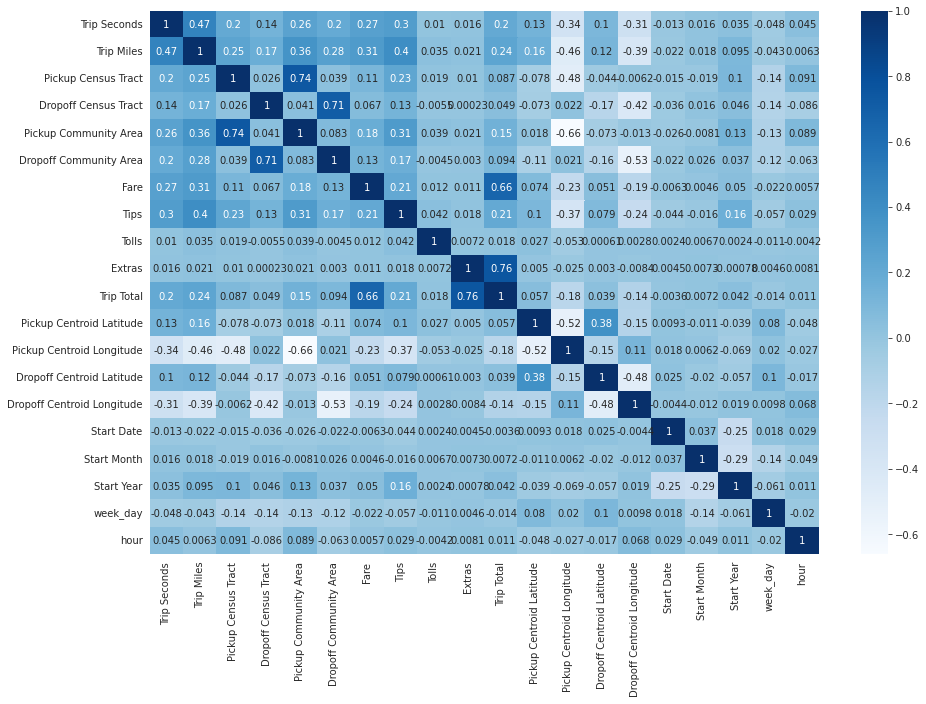

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(Taxis.corr(),annot=True,cmap="Blues")

Almost all the columns show low to moderate correlation. 

**Binding the data**

In [43]:
Taxis['Payment Type'].nunique()

8

In [44]:
Taxis['Payment Type'].unique()

array(['Credit Card', 'Cash', 'No Charge', 'Mobile', 'Unknown', 'Prcard',
       'Dispute', 'Prepaid'], dtype=object)

As we are having 8 different categories in target variable we will bind them into 2 categories as "cash" type payments and "non-cash" payments.    

In [45]:
Taxis['Payment Type'].replace({"Credit Card":"non-Cash","Mobile":"non-Cash","Prcard":"non-Cash","Prepaid":"non-Cash",
                          "No Charge": "non-Cash","Unknown":"non-Cash","Dispute":"non-Cash"},inplace=True)
Taxis['Payment Type'].unique()

array(['non-Cash', 'Cash'], dtype=object)

**Feature Selection**



*  Our main goal is to predict payment method before a trip is created, so we will consider only our target variable 'Payment Type'.
*   We found some null values in census column, so I will drop those columns. 
* pickup and drop of area is easier to analyze instead of latitude and longitude so i am dropping those columns also.









In [46]:
Taxi_Trips=Taxis.drop(["Trip ID","Taxi ID","Trip Start Timestamp","Trip End Timestamp",
                       "Pickup Census Tract","Dropoff Census Tract","Pickup Centroid Latitude","Pickup Centroid Longitude",
                       "Pickup Centroid Location","Dropoff Centroid Latitude","Dropoff Centroid Longitude","Dropoff Centroid  Location"],axis=1)

In [47]:
Taxi_Trips

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Start Date,Start Month,Start Year,month_name,week_day,week_name,hour
0,1380.0,3.9,8.0,24.0,14.05,3.5,0.0,0.0,17.55,non-Cash,Taxi Affiliation Services,16,1,2014,January,4,Thursday,14
1,180.0,0.7,7.0,7.0,4.65,0.0,0.0,0.0,4.65,Cash,Taxi Affiliation Services,21,1,2014,January,2,Tuesday,12
4,900.0,2.3,32.0,28.0,9.85,2.0,0.0,0.0,11.85,non-Cash,Taxi Affiliation Services,29,7,2014,July,2,Tuesday,18
5,240.0,0.7,24.0,24.0,4.85,0.0,0.0,0.0,4.85,Cash,Dispatch Taxi Affiliation,10,12,2013,December,2,Tuesday,11
6,420.0,1.1,32.0,8.0,6.25,0.0,0.0,1.5,7.75,Cash,Northwest Management LLC,25,1,2014,January,6,Saturday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99736,1080.0,5.4,NaN,NaN,15.45,0.0,0.0,0.0,15.45,Cash,NaN,12,2,2015,February,4,Thursday,7
99737,1020.0,1.8,8.0,32.0,9.85,0.0,0.0,0.0,9.85,Cash,Choice Taxi Association,21,1,2014,January,2,Tuesday,9
99740,480.0,0.1,8.0,24.0,7.45,2.0,0.0,0.0,9.45,non-Cash,Taxi Affiliation Services,26,7,2014,July,6,Saturday,20
99741,1440.0,9.1,32.0,4.0,21.45,6.4,0.0,0.0,27.85,non-Cash,Dispatch Taxi Affiliation,24,1,2014,January,5,Friday,20


considering payment type as a predictor

In [48]:
x=Taxi_Trips.drop("Payment Type",axis=1)
y=Taxis["Payment Type"]

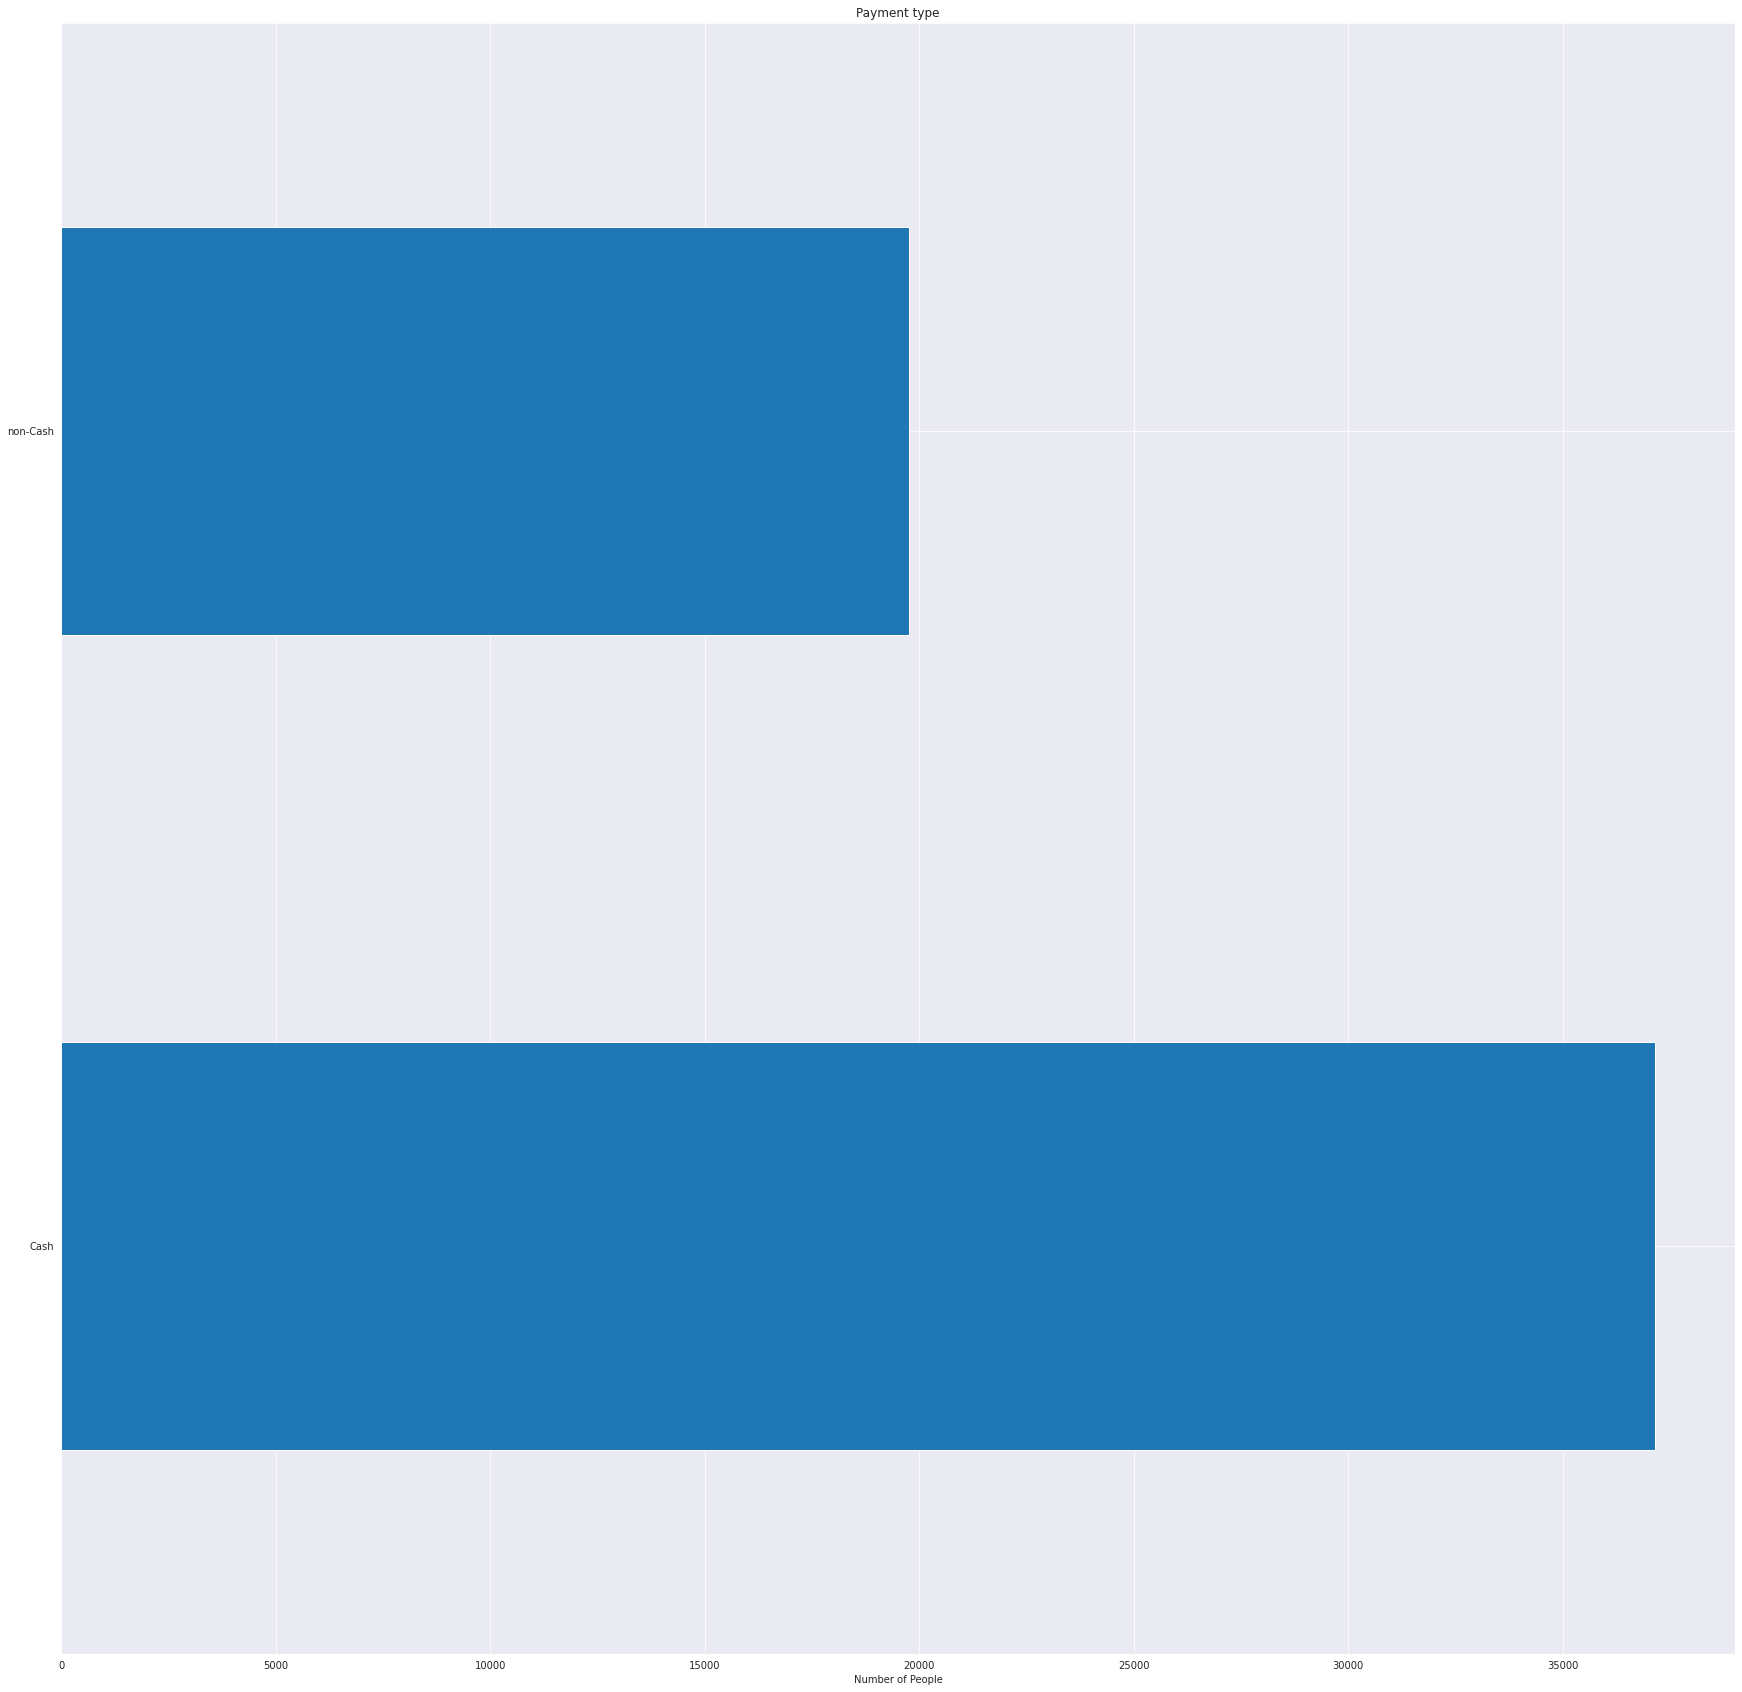

In [49]:
Taxis['Payment Type'].value_counts().plot.barh()
plt.title('Payment type')
plt.xlabel('Number of People')
plt.show()

From the graph we can say that the class is imbalance so i will be considering f1-score as a metrics to evaluate the model. 

**Libraries**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

**Splitting the Train/Test data**

In [51]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2303)

print(f'X - Training examples: {x_train.shape[0]:,}')
print(f'X - Test examples: {x_test.shape[0]:,}')
print(f'Y - Training examples: {y_train.shape[0]:,}')
print(f'Y - Test examples: {y_test.shape[0]:,}')

X - Training examples: 45,544
X - Test examples: 11,387
Y - Training examples: 45,544
Y - Test examples: 11,387


**Seperating numerical variables and categorical variables**



In [52]:
numerical_vars=["Trip Seconds","Trip Miles","Pickup Community Area","Dropoff Community Area","Fare","Tips","Tolls","Extras",
                "Trip Total","Start Date","Start Month","Start Year","week_day","hour"]
categorical_vars=["Company","month_name","week_name"]
print("numerical variables : \n")
print(numerical_vars)
print("\n categorical variables :\n")
print(categorical_vars)

numerical variables : 

['Trip Seconds', 'Trip Miles', 'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Start Date', 'Start Month', 'Start Year', 'week_day', 'hour']

 categorical variables :

['Company', 'month_name', 'week_name']


In [53]:
Taxi_Trips['Company'].nunique()

98

In [54]:
Taxi_Trips['month_name'].nunique()

11

In [55]:
Taxi_Trips['week_name'].nunique()

7

**Creating pipeline for numerical and categorical variables and applying column transform**

In [56]:
num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan,strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
num_ss=num_pipeline.fit_transform(np.array(x_train[numerical_vars]))
print(num_ss.shape)

cat_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='most_frequent')),
                          ('create_dummies', OneHotEncoder(handle_unknown='ignore', drop='first'))])
cat_ss=cat_pipeline.fit_transform(np.array(x_train[categorical_vars]))
cat_ss.shape
print(cat_ss.shape)

(45544, 14)
(45544, 108)


In [57]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                                      ('create_dummies', cat_pipeline, categorical_vars)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Trip Seconds', 'Trip Miles',
                                  'Pickup Community Area',
                                  'Dropoff Community Area', 'Fare', 'Tips',
                                  'Tolls', 'Extras', 'Trip Total', 'Start Date',
                                  'Start Month', 'Start Year', 'week_day',
                                  'hour']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                

**Applying models**

**Logistic Regression Model**


**1st Iteration**

In [58]:

lrmodel_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
                           ('model', LogisticRegression(max_iter=1000))])
params = [{'model__C':[0.1,0.5,1.0,5,10,15], 'model__penalty':[ 'l2']},{'model__penalty':['none']}]
lr_model_1= GridSearchCV(lrmodel_pipeline, param_grid=params, cv=5, scoring='accuracy')
lr_model_1 = lr_model_1.fit(x_train,y_train)
lr_model_1.best_params_


{'model__penalty': 'none'}

Since i got the best params as none i will not do any future iteration. I will be considering 'none' as best params for  future logistic regression analysis.


**Prediction**

In [59]:
predict_y_test=lr_model_1.best_estimator_.predict(x_test)

predict_y_train=lr_model_1.best_estimator_.predict(x_train)
print(predict_y_test)
print(predict_y_train)

['non-Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'Cash']
['Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'non-Cash']


**Accuracy Score for Test and Train**

In [60]:

accuracy_train_lr=accuracy_score(y_train,predict_y_train)
accuracy_test_lr=accuracy_score(y_test,predict_y_test)
print("Logistic Regression Train Score is",accuracy_train_lr)
print("Logistic Regression Test Score is",accuracy_test_lr)


Logistic Regression Train Score is 0.9719172668189004
Logistic Regression Test Score is 0.9712830420655133


Here we are predicting the test and train score for a logistic regression. The prediction shows both are similar means train predict score is 97.19% and for test is 97.12%

Confusion Matrix

In [61]:

confusion_matrix(y_test, predict_y_test)

array([[7410,    1],
       [ 326, 3650]])

**Classification Report**

In [62]:

print("\n",classification_report(y_test,lr_model_1.best_estimator_.predict(x_test)))


               precision    recall  f1-score   support

        Cash       0.96      1.00      0.98      7411
    non-Cash       1.00      0.92      0.96      3976

    accuracy                           0.97     11387
   macro avg       0.98      0.96      0.97     11387
weighted avg       0.97      0.97      0.97     11387



In [63]:
print("Overall Accuracy score:",accuracy_score(y_test, predict_y_test))
print("Overall Precision score:",precision_score(y_test, predict_y_test, average='macro'))
print("Overall Recall score:",recall_score(y_test, predict_y_test, average='macro'))

Overall Accuracy score: 0.9712830420655133
Overall Precision score: 0.9787927306397335
Overall Recall score: 0.9589365568664993


**F1-Score**

In [64]:
lr_score=f1_score(predict_y_test, y_test,average='weighted')
lr_score

0.9715868011436486

**Plotting ROC- Curve**

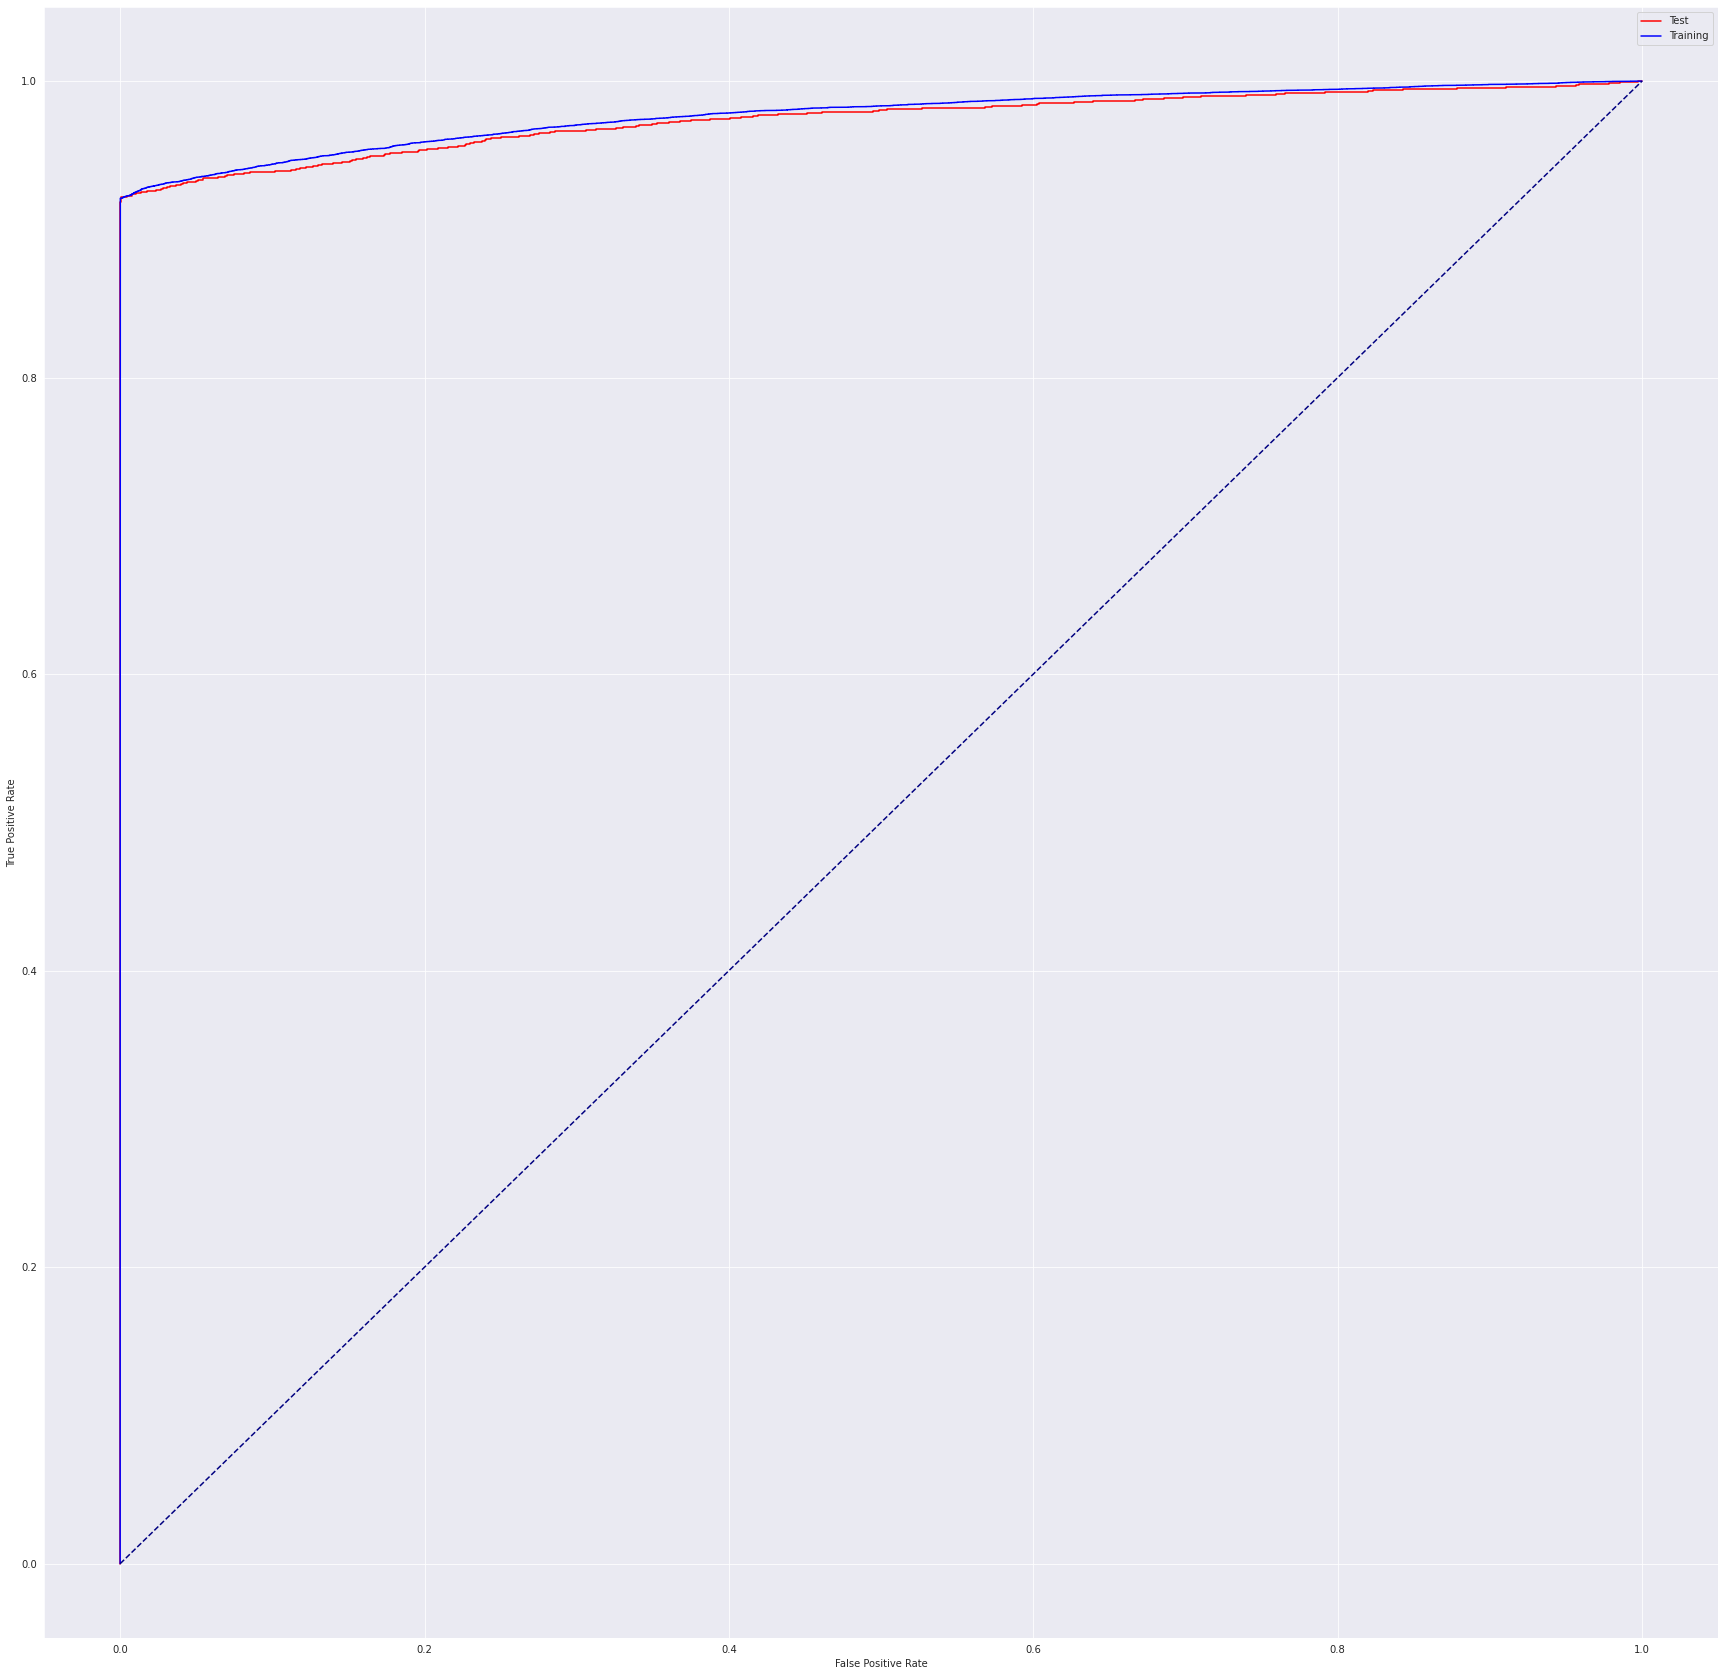

In [65]:

def generate_probs(X, model=lr_model_1.best_estimator_):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='non-Cash')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(x_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(x_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [66]:
lr_roc_test=roc_auc_score(y_test, generate_probs(x_test))
lr_roc_train=roc_auc_score(y_train, generate_probs(x_train))
print("ROC AUC Score for Test",lr_roc_test)
print("ROC AUC Score for Train",lr_roc_train)

ROC AUC Score for Test 0.9738550042665927
ROC AUC Score for Train 0.977059218499406


The roc accuracy score for non penality logistic regression is 97.3%.

**Decision Tree**

**1st Iteration**

In [67]:

tree_pipline = modeling_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
        ('dt', DecisionTreeClassifier())
        ]
    )

param_grid = [
  {'dt__max_depth': [5,10,15],
   'dt__min_samples_split': [0.5,0.75,1.0],
   'dt__min_samples_leaf':[2,3,5,7],
   
  }
 ]
taxi_gs_1 = GridSearchCV(estimator=tree_pipline, param_grid=param_grid, scoring='accuracy', refit=True)
taxi_gs_1 = taxi_gs_1.fit(x_train, y_train)


taxi_gs_1.best_params_

{'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 0.5}

**2nd Iteration**

In [68]:
tree_pipline = modeling_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
        ('dt', DecisionTreeClassifier())
        ]
    )

param_grid = [
  {'dt__max_depth': [1,2.5,5],
   'dt__min_samples_split': [0.1,0.2,0.5],
   'dt__min_samples_leaf':[1,2],
   
  }
 ]
taxi_gs_2 = GridSearchCV(estimator=tree_pipline, param_grid=param_grid, scoring='accuracy', refit=True)
taxi_gs_2 = taxi_gs_2.fit(x_train, y_train)


taxi_gs_2.best_params_

{'dt__max_depth': 1, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 0.1}

1st iteration has given a best params as max_depth 5 and min_samples_leaf 2 . So i have used 2nd iteration to find out accurate params. 2nd iteration have given values as 1 for max_depth and 1 for min_samples_leaf and split as 0.1 . So i will consider 2nd iteration params as best params for future analysis.
 

**Prediction**

In [69]:
predict_y_test_dt=taxi_gs_2.best_estimator_.predict(x_test)
 
predict_y_train_dt=taxi_gs_2.best_estimator_.predict(x_train)
print(predict_y_test)
print(predict_y_train)

['non-Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'Cash']
['Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'non-Cash']


**Accuracy Scores for Test and Train Data**

In [70]:
accuracy_train_dt=accuracy_score(y_train,predict_y_train_dt)
accuracy_test_dt=accuracy_score(y_test,predict_y_test_dt)
print("Decision Tree Train Score is",accuracy_train_dt)
print("Decision Tree Test Score is",accuracy_test_dt)

Decision Tree Train Score is 0.9715220446161953
Decision Tree Test Score is 0.9710195837358391


**Confusion Matrix**

In [71]:
confusion_matrix(y_test, predict_y_test_dt)

array([[7411,    0],
       [ 330, 3646]])

**Classification Report**

In [72]:
print("\n",classification_report(y_test,predict_y_test_dt))


               precision    recall  f1-score   support

        Cash       0.96      1.00      0.98      7411
    non-Cash       1.00      0.92      0.96      3976

    accuracy                           0.97     11387
   macro avg       0.98      0.96      0.97     11387
weighted avg       0.97      0.97      0.97     11387



In [73]:
print("Overall Accuracy score:",accuracy_score(y_test, predict_y_test_dt))
print("Overall Precision score:",precision_score(y_test, predict_y_test_dt, average='macro'))
print("Overall Recall score:",recall_score(y_test, predict_y_test_dt, average='macro'))

Overall Accuracy score: 0.9710195837358391
Overall Precision score: 0.9786849244283684
Overall Recall score: 0.9585010060362174


**F1-Score**

In [74]:
dt_score=f1_score(predict_y_test_dt, y_test,average='weighted')
dt_score

0.9713313611376513

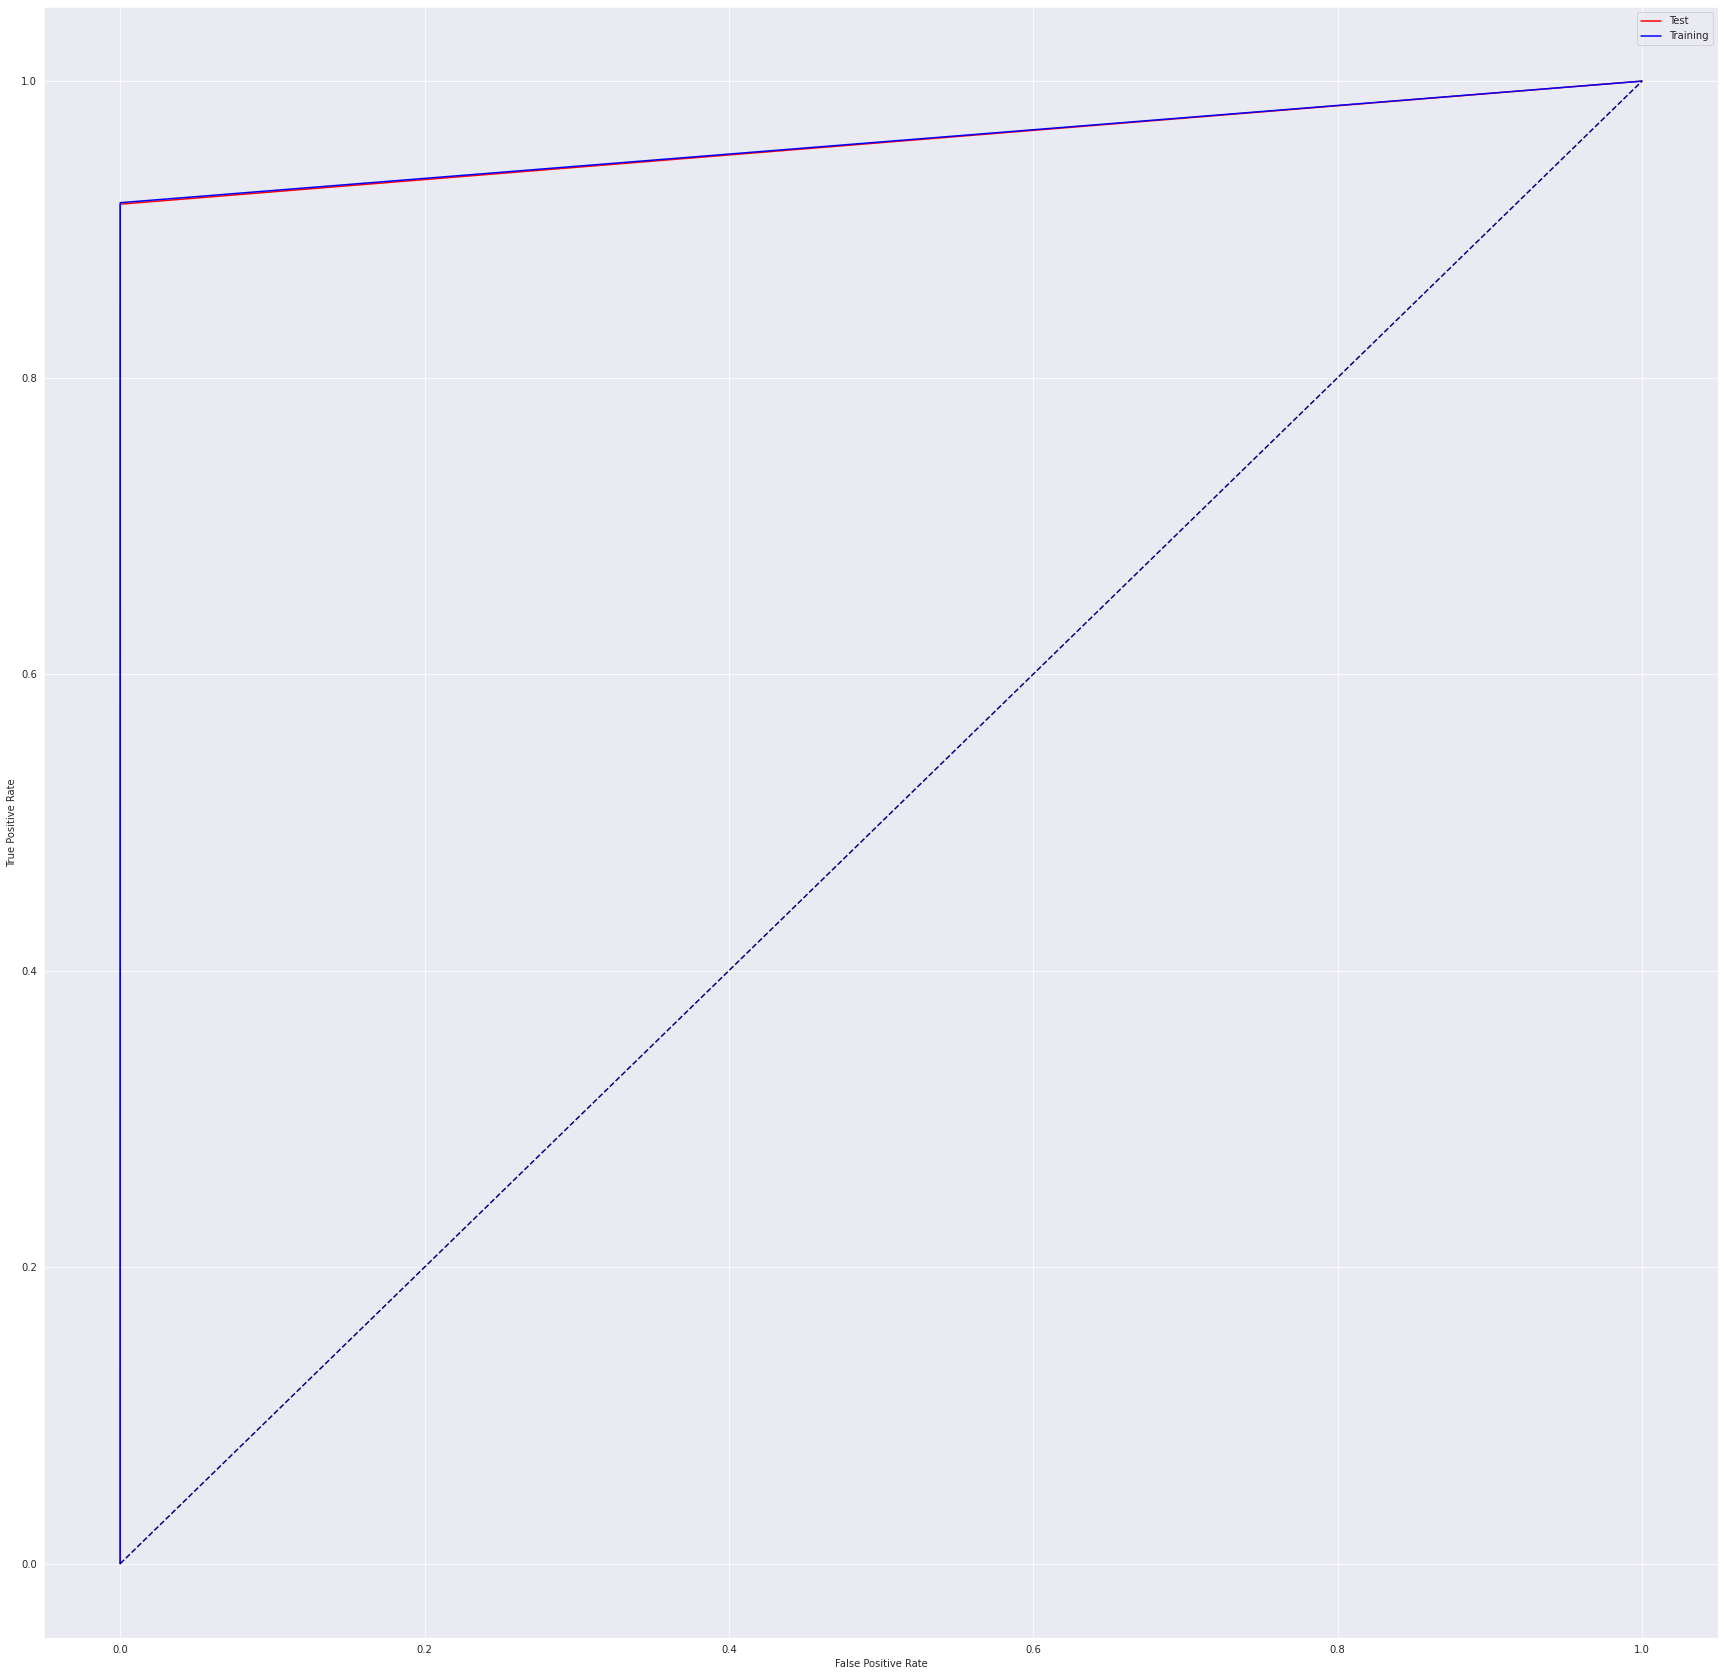

In [75]:

def generate_probs(X, model=taxi_gs_2.best_estimator_):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='non-Cash')
    return fpr, tpr
      
fpr_test, tpr_test = generate_roc(y_test, generate_probs(x_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(x_train))
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [76]:
dt_roc_test=roc_auc_score(y_test, generate_probs(x_test))
dt_roc_train=roc_auc_score(y_train, generate_probs(x_train))
print("ROC AUC Score for Test",dt_roc_test)
print("ROC AUC Score for Train",dt_roc_train)

ROC AUC Score for Test 0.9585010060362174
ROC AUC Score for Train 0.958964615764552


**Support Vector Classifer**

In [77]:
#svm_m = modeling_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
 #                                      ('model', SVC())])
#param_grid = [
 #             {'model__C': [1,5], 'model__kernel': ['linear']}
  #            ]
#taxi_sv_2 = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True,cv=5)
#taxi_sv_2 = taxi_sv_2.fit(x_train, y_train)




Support Vector Classifer is taking 45vminutes to train the data so its a drawback for using this model. I am considering stochastic gradient descent (SGD) classifer for better performance. 

**SGD Classifer**

**1st Iteration**

In [78]:
sgdc_pipeline=Pipeline(steps=[('data_processing', processing_pipeline),
                ('sgdclassifier', SGDClassifier(max_iter=1000, tol=1e-3,loss='log'))])
Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'sgdclassifier__alpha': Cs}]
sgdc_1= GridSearchCV(sgdc_pipeline,tuned_parameters, scoring = 'accuracy', cv=2)
sgdc_1=sgdc_1.fit(x_train, y_train)
sgdc_1.best_estimator_


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Trip Seconds', 'Trip Miles',
                                                   'Pickup Community Area',
                                                   'Dropoff Community Area',
                                                   'Fare', 'Tips', 'Tolls',
                                                   'Extras', 'Trip Total',
                                                   'Start Date', 'Start Month',
                                                   'Start Year', 'week_d

In [79]:
sgdc_1.best_params_

{'sgdclassifier__alpha': 0.0001}

**2nd Iteration**

In [80]:
sgdc_pipeline=Pipeline(steps=[('data_processing', processing_pipeline),
                ('sgdclassifier', SGDClassifier(max_iter=1000, tol=1e-3,loss='log'))])
Cs = [0.0001,0.0002,0.0005]
tuned_parameters = [{'sgdclassifier__alpha': Cs}]
sgdc_2= GridSearchCV(sgdc_pipeline,tuned_parameters, scoring = 'accuracy', cv=5)
sgdc_2=sgdc_2.fit(x_train, y_train)
sgdc_2.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Trip Seconds', 'Trip Miles',
                                                   'Pickup Community Area',
                                                   'Dropoff Community Area',
                                                   'Fare', 'Tips', 'Tolls',
                                                   'Extras', 'Trip Total',
                                                   'Start Date', 'Start Month',
                                                   'Start Year', 'week_d

In [81]:
sgdc_2.best_params_

{'sgdclassifier__alpha': 0.0001}

Both the iterations says params having alpha value as 0.0001 is the best .so I am considering one of them for future analysis.

***Prediction***

In [82]:
predict_y_test_sgdc=sgdc_1.best_estimator_.predict(x_test)
 
predict_y_train_sgdc=sgdc_1.best_estimator_.predict(x_train)
print(predict_y_test)
print(predict_y_train)

['non-Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'Cash']
['Cash' 'Cash' 'Cash' ... 'Cash' 'Cash' 'non-Cash']


**Accuracy Score for Test and Train**

In [83]:
accuracy_train_sgdc=accuracy_score(y_train,predict_y_train_sgdc)
accuracy_test_sgdc=accuracy_score(y_test,predict_y_test_sgdc)
print("SGD Classifier Train Accuracy Score is",accuracy_train_sgdc)
print("SGD Classifier Test Accuracy Score is",accuracy_test_sgdc)

SGD Classifier Train Accuracy Score is 0.9697435447040225
SGD Classifier Test Accuracy Score is 0.9692631948713445


**Confusion Matrix**

In [84]:
confusion_matrix(y_test, predict_y_test_sgdc)

array([[7409,    2],
       [ 348, 3628]])

**Classification Report**

In [85]:
print("\n",classification_report(y_test,predict_y_test_sgdc))


               precision    recall  f1-score   support

        Cash       0.96      1.00      0.98      7411
    non-Cash       1.00      0.91      0.95      3976

    accuracy                           0.97     11387
   macro avg       0.98      0.96      0.97     11387
weighted avg       0.97      0.97      0.97     11387



In [86]:
print("Overall Accuracy score:",accuracy_score(y_test, predict_y_test_sgdc))
print("Overall Precision score:",precision_score(y_test, predict_y_test_sgdc, average='macro'))
print("Overall Recall score:",recall_score(y_test, predict_y_test_sgdc, average='macro'))

Overall Accuracy score: 0.9692631948713445
Overall Precision score: 0.9772931655794056
Overall Recall score: 0.9561024899905437


**F1-Score**

In [87]:
sgdc_score=f1_score(predict_y_test_sgdc, y_test,average='weighted')
print("F1-score for SGD Classifer",sgdc_score)

F1-score for SGD Classifer 0.9696117382676639


**ROC-Curve**

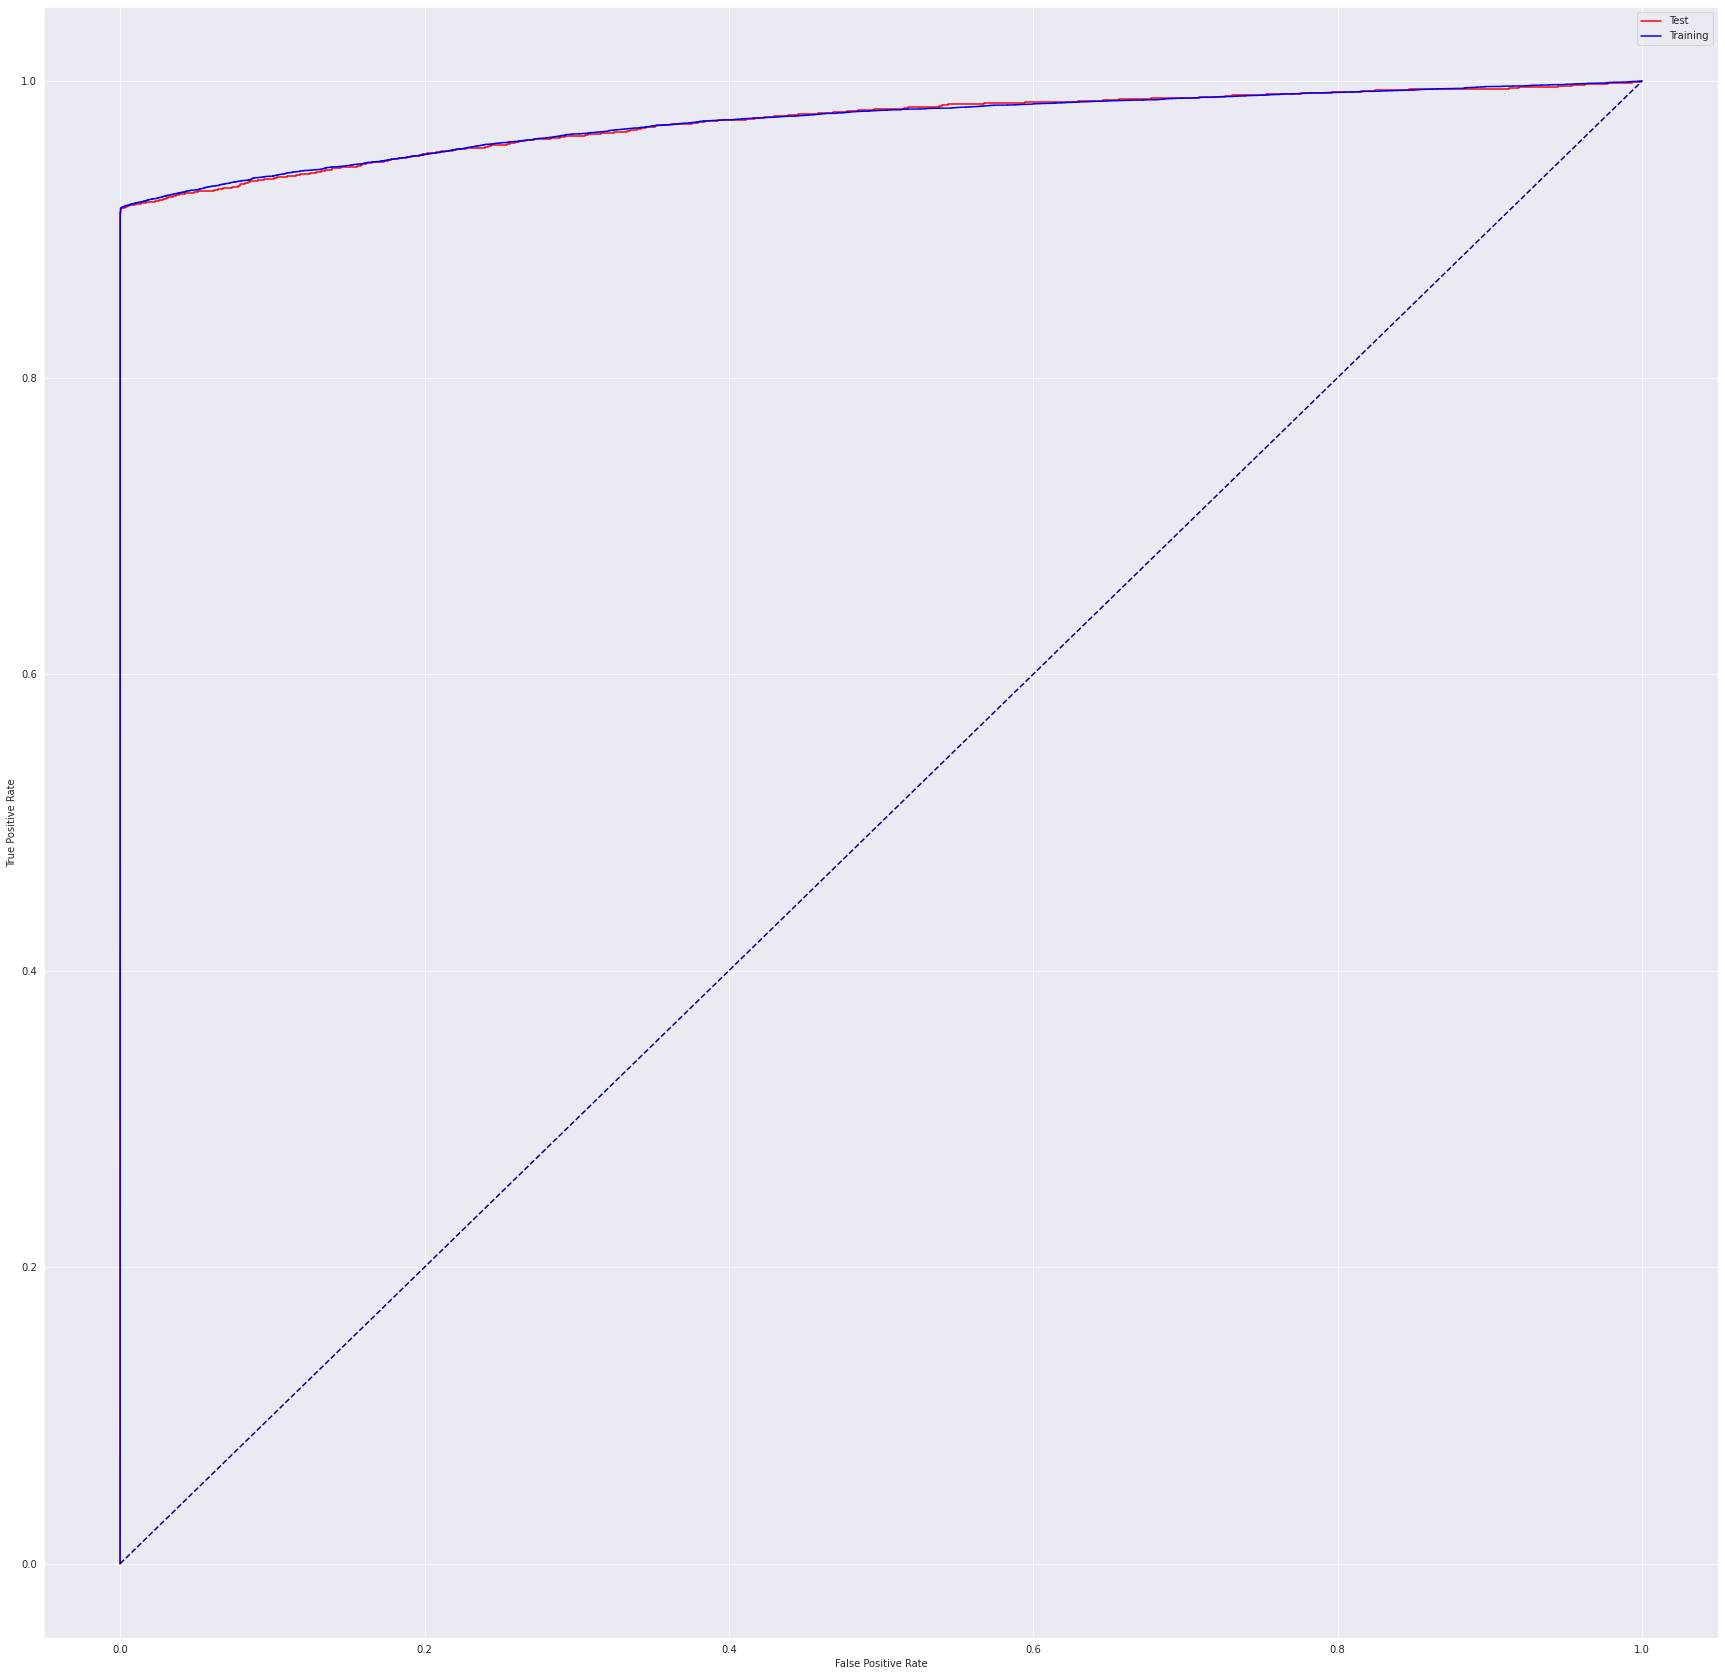

In [88]:
def generate_probs(X, model=sgdc_1.best_estimator_):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='non-Cash')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(x_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(x_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [89]:
sgdc_roc_test=roc_auc_score(y_test, generate_probs(x_test))
sgdc_roc_train=roc_auc_score(y_train, generate_probs(x_train))
print("ROC AUC Score for Test",sgdc_roc_test)
print("ROC AUC Score for Train",sgdc_roc_train)

ROC AUC Score for Test 0.9723090261987525
ROC AUC Score for Train 0.9725370560769432


#**Results**

In [90]:
Models=[]
accuracy=[]
result_df = pd.DataFrame()
Models = ['Logistic Regression', 'Decision Tree', 'SGD Classifer']
result_df['Algorithms'] = Models
result_df['F1-Score']=pd.DataFrame({lr_score,dt_score,sgdc_score})
result_df['ROC_AUC']=pd.DataFrame({lr_roc_test,dt_roc_test,sgdc_roc_test})
result_df['Accuracy-Test']=pd.DataFrame({accuracy_test_lr,accuracy_test_dt,accuracy_test_sgdc})
result_df['Accuracy-Train']=pd.DataFrame({accuracy_train_lr,accuracy_train_dt,accuracy_train_sgdc})
result_df

,Algorithms,F1-Score,ROC_AUC,Accuracy-Test,Accuracy-Train
0,Logistic Regression,0.971587,0.973855,0.971283,0.971917
1,Decision Tree,0.971331,0.958501,0.971020,0.971522
2,SGD Classifer,0.969612,0.972309,0.969263,0.969744


I have considered F1-score and AUC as the metrics because, my class is imbalance so to evaluate and imbalance class F1-score is a best metrics. I also considered AUC score as a metrics because "Cash" or "Non-Cash" transcations are equally important and it depends on each individual.  

#**Model Selection**
 
 We have selected Logistic Regession as best model because it has a F1-score of 97.1% and Roc_AUC score is 97.3%

#**Summary**



* Logistic Regression performed better than decision tree and stochastic    gradient descent with 97.1% of F1-score.
*  For the given dataset we have seen that majority of people choose cash payments and credit card transacations. 
*  Most of the trips are done on Sundays in a week and on the second half in a month.
*  Prices for most of trips are low below 20$.
*   In a day most of trips are taken place in evening time around 6 p.m.
*   We have observed that pick up and drop of community area are same , so we can say that most people are travelling for short distance.









#**Future Work:**



* We have only used chunk data for faster analysis, to improve the above models we can use more data which may leads to increase performance and score values.
* We can use more algorithms like svm,random forest, Knn, neural networks, but this may also takes more time to evaluate.
* Improving features for modeling can also give us a better perfomance. 






**References:**
1.  https://matplotlib.org/stable/api/matplotlib_configuration_api.html
2. https://stackoverflow.com/questions/35193808/
3. https://www.kaggle.com/fevsea/how-much-will-it-cost-me-pre-ride-regression
4. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier